# Type 1 and Type 2 errors - Lab

## Introduction

In this lab, you'll run some of your own simulations to learn more about type 1 and type 2 errors. Remember that, the result of a statistical hypothesis test and the corresponding decision of whether to reject or accept the null hypothesis is not infallible. A test provides evidence for or against the null hypothesis and then you decide whether to accept or reject it based on that evidence, but the evidence may lack the strength to arrive at the correct conclusion. Incorrect conclusions made from hypothesis tests fall in one of two categories, i.e. [Type 1 and Type 2 errors](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors) By running some of these simulations, you should have a better idea of why a 95% confidence level is often used for hypothesis testing.


## Objectives

You will be able to:

* Explain why alpha = 0.05 is chosen as the cutoff point for rejecting the null hypothesis in most scientific experiments
* Simulate Type I and Type II errors with alpha control to observe the output of an experiment
* Describe and differentiate between TYPE I and TYPE II errors
* Understand alpha and beta for representing false positive and false negative values

## Alpha and Beta

**Alpha ($\alpha$):** is the probability of a Type I error i.e. finding a difference when a difference does not exist. 

Most medical literature uses an alpha cut-off of 5% (0.05), indicating a 5% chance that a significant difference is actually due to chance and is not a true difference. 

**Beta ($\beta$):** is the probability of a Type II error i.e. not detecting a difference when one actually exists. 

Beta is directly related to study power (Power = $1 - \beta$) which you will investigate further in the next lesson. Most medical literature uses a beta cut-off of 20% (0.2), indicating a 20% chance that a significant difference is missed. 



Now you will attempt to create a simulation to visualize this phenomenon using python.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import random 

import seaborn as sns
sns.set(color_codes=True)

 First, create a population of 1000 elements with a mean of 100 and a standard deviation of 20.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


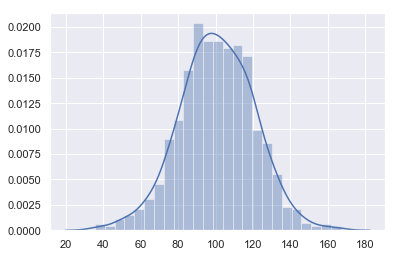

In [2]:
# Create a population with mean=100 and sd=20 and size = 1000
pop = np.random.normal(100, 20, 1000)
pop.dtype
sns.distplot(pop)

Now take two samples from this population and comment on the difference between their means and standard deviations. How would you ensure the independence between the elements of these samples? 

In [3]:
k = 100
sample1 = np.random.choice(pop,100,replace=True)

print ("Sample 1 Summary")
stats.describe(sample1)

Sample 1 Summary


DescribeResult(nobs=100, minmax=(66.12479988026418, 143.6379956989266), mean=103.70218990278084, variance=277.2398771427088, skewness=0.0019203382150721593, kurtosis=-0.218421442172962)

In [4]:
sample2 = np.random.choice(pop,100,replace=True)
print ("Sample 2 Summary")
stats.describe(sample2)

Sample 2 Summary


DescribeResult(nobs=100, minmax=(41.48171635533239, 140.0688562287729), mean=101.89513524075326, variance=301.783609537175, skewness=-0.17303883641539053, kurtosis=0.6468500989447552)

You can see can see that if you took two samples from this population, the difference between the mean of samples 1 and 2 is very small (this can be tried repeatedly). You must sample with replacement in order to ensure the independence assumption between elements of the sample. 

There is, however, still a probability of seeing a very large difference between values, even though they're estimates of the same population parameters. In a statistical setting, you'd interpret these unusually large differences as evidence that the two samples are statistically different. It depends on how you define statistical significance. In statistical tests, this is done by setting a significance threshold $\alpha$  (alpha). Alpha controls how often we'll get a type 1 error. A type 1 error occurs when the statistical test erroneously indicates a significant result.

You can run two-sample t-test with independence assumption on these samples and, as expected, the null hypothesis will fail to be rejected due to similarities between distributions. You can also visualize the distribution to confirm the similarity between means and SDs. 

In [5]:
# test the sample means
stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=0.7509710577958174, pvalue=0.45356165601019294)

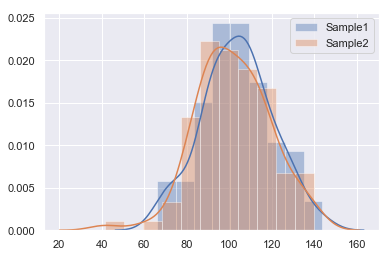

In [6]:
plt.figure("Test Samples")
sns.distplot(sample1, label='Sample1') 
sns.distplot(sample2, label='Sample2')
plt.legend()
plt.show()


## Simulating Type I and II errors

### Type I error
Remember that when a hypothesis test is being performed, scientists are trying to determine if two samples are from the same population or not. When a hypothesis is rejected, they are concluding that a sample must have come from a different population. Type I error describes a situation where you reject the null hypothesis when it is actually true. It assumes two samples come from a _different_ population when, in reality, they are from the _same_ population. This type of error is also known as a "false positive" or "false hit". The type 1 error rate is equal to the significance level $\alpha$, so setting a higher confidence level (and therefore lower alpha) reduces the chances of getting a false positive. 



### How alpha affects the prevalence of TYPE I errors.

Next, we shall see how alpha affects the rate of type 1 errors. 

**Exercise:** Write a function `type_1_error` in Python to encapsulate the code shown above in order to repeat hypothesis tests on two randomly drawn distributions. The t-test will mostly fail to reject the null hypothesis, except, when by random chance you get a set of **extremely** different samples thus reject the null hypothesis (TYPE I ERROR). The frequency of such bad results depends upon the value of alpha. 

`type_1_error` should take in the parameters:

* population: (numpy array) a random normal distribution
* num_tests: (int) specifies the number of hypothesis tests to compute
* alphas: (list) a list of the alpha levels at which you are testing

`type_1_error` should return:

* sig_tests: (DataFrame) a dataframe that has the columns 'type_1_error', 'p_value', 'alpha'

Within `type_1_error`, you should:

1. Repeatedly take two random samples from population and run independent t-tests.    
2. Store P_value, alpha and a boolean variable to show whether the null hypothesis ** was rejected ** or not (i.e. if p-value is less than alpha), for each test

To test your function:

1. Create a population distribution with a mean of 100, a standard deviation of 20, and a size of 1000 
2. Specify the number of hypothesis tests to be 1000
3. Create a list of alphas =  [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]



In [92]:
def type_1_error(population, num_tests, alpha_set):
    """
    Parameters
    ----------
    population: ndarray
        A random normal distribution
    num_tests: int
        The number of hypothesis tests to be computed
    alpha_set: list
        List of alpha levels
    
    Returns
    ----------
    sig_tests : DataFrame
        A dataframe containing the columns 'type_2_error', 'p_value', and 'alpha'
    """
    sig_tests = pd.DataFrame(columns = ['type_1_error', 'p_value', 'alpha'])
    for n in range(num_tests):
        sample1 = np.random.choice(population,100,replace=True)
        sample2 = np.random.choice(population,100,replace=True)
        results_list = []
        for alpha in alpha_set:
            p_value = stats.ttest_ind(sample1, sample2)[1]
            if p_value>alpha:
                type_1_error = 0
            else:
                type_1_error = 1
            results = {'type_1_error': type_1_error, 'p_value': p_value, 'alpha': alpha}
            results_list.append(results)
        results_df = pd.DataFrame(results_list)
        sig_tests = pd.concat([sig_tests, results_df])
    return sig_tests
  

Now we have to summarize the results, this is done using pandas groupby() method which sums the "type_1_error" column for each level of alpha. The groupby method iterates over each value of alpha, selecting the type 1 error column for all rows with a specific level of alpha and then applies the sum function to the selection. 

What's the relationship between alpha and Type 1 errors?

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



6000


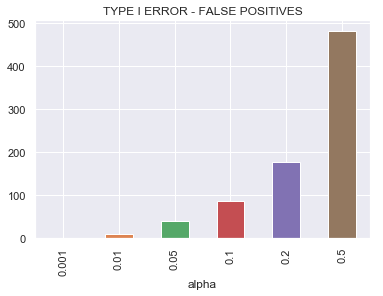

In [97]:
# group type 1 error by values of alpha
pop = np.random.normal(100, 20, 1000)
num_tests = 1000
alpha_set = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
sig_tests_1 = type_1_error(pop, num_tests, alpha_set)
group_error = sig_tests_1.groupby('alpha')['type_1_error'].sum()
group_error.plot.bar(title = "TYPE I ERROR - FALSE POSITIVES");

Grouped data clearly shows that as value of alpha is increases from .001 to 0.5, the probability of TYPE I errors also increase. 

### Type II error 

This error describes a situation where you fail to reject the null hypothesis when it is actually false. Type II error is also known as a "false negative" or "miss". The higher your confidence level, the more likely you are to make a type II error.

## How alpha affects the prevalence of TYPE II errors.

**Exercise** Write a function called `type_2_error` similar to the above except samples should be taken from two different populations.  The hypothesis test should, in most cases, reject the null hypothesis as the samples belong to different populations, except, in extreme cases where there is no significant difference between samples i.e. a TYPE II error (False Negatives). Your function should demonstrate how the rate of false negatives is affected by alpha. 

`type_2_error` should take in the parameters:

* population: (numpy array) a random normal distribution
* population_2: (numpy array) a random normal distribution with a different mean than the population
* num_tests: (int) specifies the number of hypothesis tests to compute
* alphas: (list) a list of the alpha levels at which you are testing

`type_2_error` should return:

* sig_tests: (DataFrame) a dataframe that has the columns 'type_2_error', 'p_value', 'alpha'

Within `type_2_error`, you should:

1. Repeatedly take two random samples from population and run independent t-tests.    
2. Store p_value, alpha and a boolean variable to show whether the null hypothesis **failed to be rejected** or not (i.e. if p-value is less than alpha), for each test

To test your function:

1. Create a population distribution with a mean of 100, a standard deviation of 20, and a size of 1000 
2. Create a second population distribution with a mean of 110, a standard deviation of 20 and a size of 1000
3. Specify the number of hypothesis tests to be 1000
4. Create a list of alphas =  [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]

In [99]:
def type_2_error(population, population_2, num_tests, alpha_set):
    
    """
    Parameters
    ----------
    population: ndarray
        A random normal distribution
    population_2: ndarray
        A different random normal distribution
    num_tests: int
        The number of hypothesis tests to be computed
    alpha_set: list
        List of alpha levels
    
    Returns
    ----------
    sig_tests : DataFrame
        A dataframe containing the columns 'type_2_error', 'p_value', and 'alpha'
    """
    sig_tests = pd.DataFrame(columns = ['type_1_error', 'p_value', 'alpha'])
    for n in range(num_tests):
        sample1 = np.random.choice(population,100,replace=True)
        sample2 = np.random.choice(population_2,100,replace=True)
        results_list = []
        for alpha in alpha_set:
            p_value = stats.ttest_ind(sample1, sample2)[1]
            if p_value>alpha:
                type_2_error = 1
            else:
                type_2_error = 0
            results = {'type_2_error': type_2_error, 'p_value': p_value, 'alpha': alpha}
            results_list.append(results)
        results_df = pd.DataFrame(results_list)
        sig_tests = pd.concat([sig_tests, results_df])
    return sig_tests

Now, create a visualization that will represent each one of these decisions. What's the relationship between alpha and Type 2 errors?

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



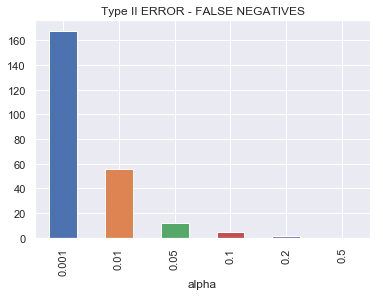

In [101]:
pop = np.random.normal(100, 20, 1000)
pop2 = np.random.normal(110,20, 1000)
num_tests = 1000
alpha_set = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
sig_tests_2 = type_2_error(pop,pop2,num_tests,alpha_set)

group_error2 = sig_tests_2.groupby('alpha')['type_2_error'].sum()
group_error2.plot.bar(title = "Type II ERROR - FALSE NEGATIVES");

Grouped data clearly shows that as value of alpha is increases from .001 to 0.5, the probability of TYPE II errors decreases. 

### Why is an α level of 0.05 chosen as a cut-off for statistical significance?

The $\alpha$ level of 0.05 is considered s good balance to avoid excessive type I or type II errors. 


If you decide to use a large value for alpha : 

* Increases the chance of rejecting the null hypothesis
* The risk of a Type II error (false negative) is REDUCED
* Risk of a Type I error (false positive) is INCREASED

Similarly, if you decide to use a very small value of alpha, it'll change the outcome as:
* Increases the chance of accepting the null hypothesis
* The risk of a Type I error (false positive) is REDUCED
* Risk of a Type II error (false negative) is INCREASED

From above, you can see that in statistical hypothesis testing, the more you try and avoid a Type I error (false positive), the more likely a Type II error (false negative) will occur. 

## Summary

The statistical key point here is that there is always a trade off between false positives and false negatives. By increasing alpha, the number of false positives increases, but the number of false negatives decreases as shown in the bar graphs. The value of $\alpha$ = 0.05 is considered a reasonable compromise between these two types of errors. Within the concept of "significance" there is embedded a trade-off between these two types of errors. 

 Think of "significance" as a compromise between false positives and negatives, not as absolute determination.